# **ML Lab Week 10: SVM Classifier Lab**

**Objective:** The goal of this lab is to understand and implement Support Vector Machine (SVM) classifiers. You will train SVMs using three different kernels: **Linear, Radial Basis Function (RBF), and Polynomial**, on distinct datasets. You will then evaluate their performance using standard classification metrics and visualize their decision boundaries to see how they separate data.

## **Core Concepts**
**Support Vector Machine (SVM):** A powerful supervised learning algorithm that finds an optimal hyperplane to separate data points of different classes.

**Kernel Trick:** A technique that allows SVMs to solve non-linear problems by transforming data into a higher-dimensional space.

- Linear Kernel: Creates a straight-line decision boundary.

- RBF Kernel: Creates a complex, non-linear boundary, like a circle or a wave.

- Polynomial Kernel: Creates a curved, polynomial decision boundary.



---



## 1. Setup and Imports
First, let's import the necessary libraries.

In [1]:
# Core libraries for data manipulation and analysis
import numpy as np
import pandas as pd

# Libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for all plots
sns.set_style("whitegrid")



---



## 2. Helper Function for Visualization
This helper function plots the decision boundaries for our trained models. It will work for all our datasets

In [2]:
def plot_decision_boundaries(X, y, model, title):
    """
    Visualizes the decision boundaries of a trained classifier.
    (Corrected version)
    """
    # Create a meshgrid to plot the decision boundary
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the data points
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot the training points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)

    # Get unique labels and ensure they are a list for the legend function
    unique_labels = np.unique(y)
    if len(unique_labels) == 2:
        legend_labels = ['Class 0', 'Class 1']
    else:
        legend_labels = list(unique_labels.astype(str)) # Convert numpy array to a list

    plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
    plt.show()



---



## 3. Experiments

# **PART 1**

## Dataset 1: The Moons Dataset
The Moons dataset is a synthetic dataset designed to test non-linear classification algorithms. The data points are shaped like two interlocking half-moons.

### Step 1.1: Generate and Prepare the Data
We will generate the data using scikit-learn and apply feature scaling.

In [3]:
from sklearn.datasets import make_moons

# Generate non-linearly separable data
X_moons, y_moons = make_moons(n_samples=500, noise=0.2, random_state=42)

# Split the data into training and testing sets
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=42
)

# Scale the features
# Feature scaling is crucial for SVMs to perform optimally.
scaler_moons = StandardScaler()
X_train_moons_scaled = scaler_moons.fit_transform(X_train_moons)
X_test_moons_scaled = scaler_moons.transform(X_test_moons)

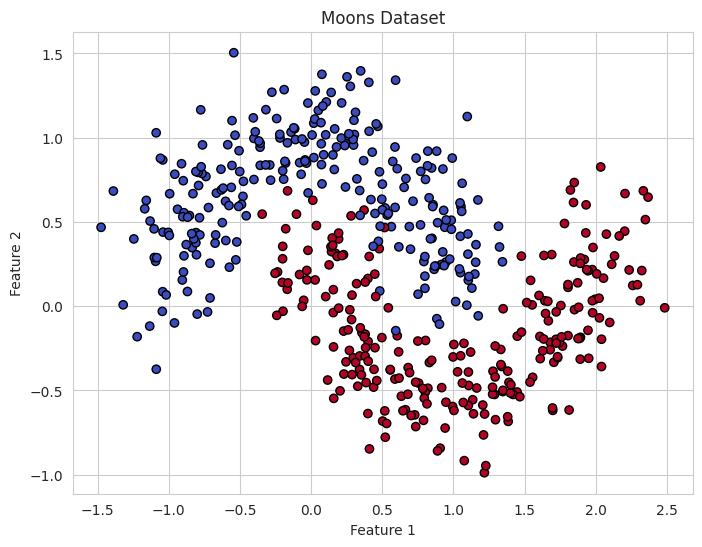

In [4]:
# Visualize the Moons dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Moons Dataset')
plt.show()

### Step 1.2: Train and Evaluate SVM Kernels

In [5]:
kernels = ['linear', 'rbf', 'poly']
models_moons = {}

for kernel in kernels:
    # Initialize SVM with the current kernel
    svm_model = SVC(kernel=kernel, C=1.0, random_state=42)

    # Train the model
    svm_model.fit(X_train_moons_scaled, y_train_moons)

    # Store the trained model
    models_moons[kernel] = svm_model

    # Make predictions
    y_pred_moons = svm_model.predict(X_test_moons_scaled)

    # Print classification report with SRN
    print(f"SVM with {kernel.upper()} Kernel PES2UG23CS198")
    print(classification_report(y_test_moons, y_pred_moons))
    print("-" * 40 + "\n")


SVM with LINEAR Kernel PES2UG23CS198
              precision    recall  f1-score   support

           0       0.85      0.89      0.87        75
           1       0.89      0.84      0.86        75

    accuracy                           0.87       150
   macro avg       0.87      0.87      0.87       150
weighted avg       0.87      0.87      0.87       150

----------------------------------------

SVM with RBF Kernel PES2UG23CS198
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        75
           1       1.00      0.95      0.97        75

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

----------------------------------------

SVM with POLY Kernel PES2UG23CS198
              precision    recall  f1-score   support

           0       0.85      0.95      0.89        75
           1       0.94      0.83      0.88    

### Step 1.3: Visualize Decision Boundaries

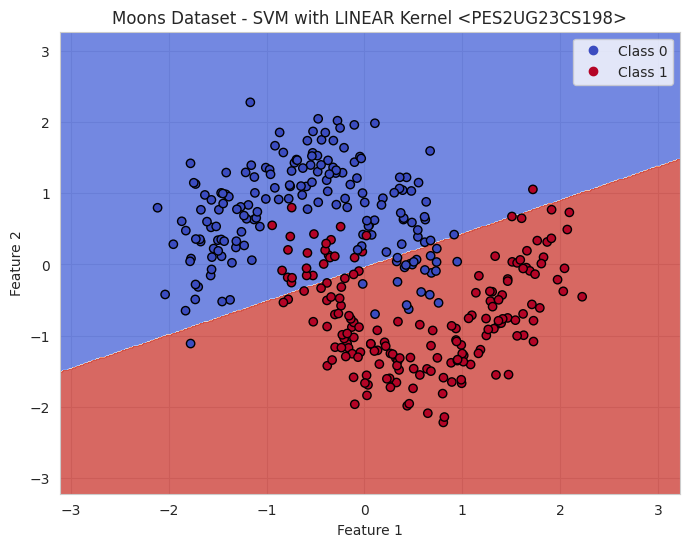

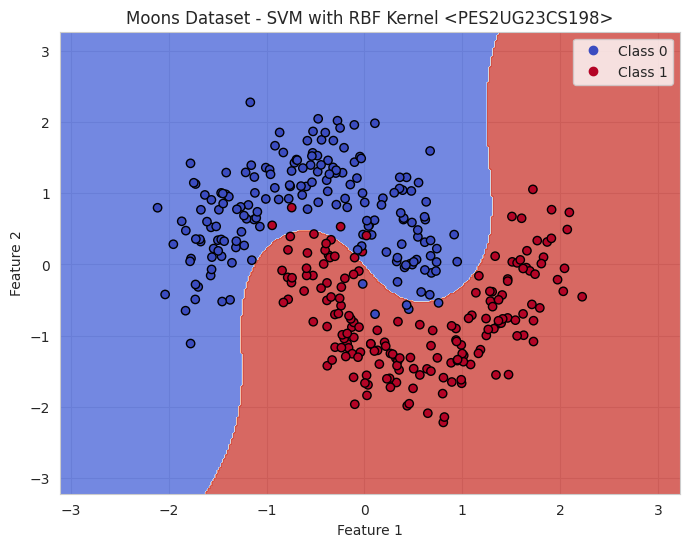

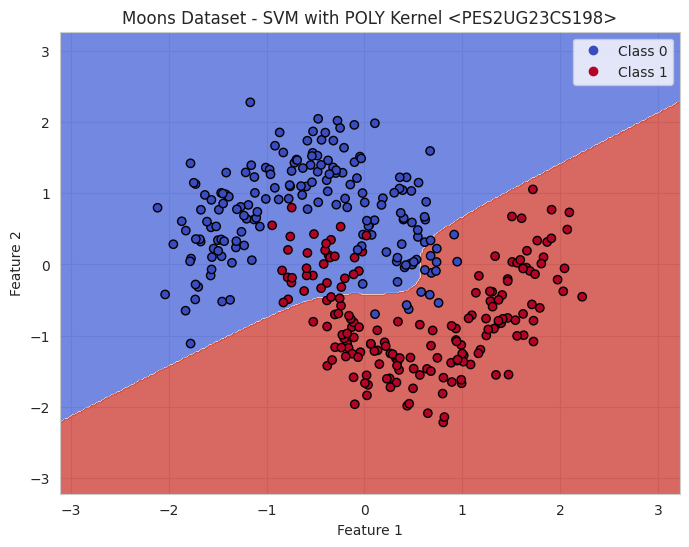

In [6]:
#TODO: Replace with your SRN
for kernel, model in models_moons.items():
    plot_decision_boundaries(
        X_train_moons_scaled,
        y_train_moons,
        model,
        title=f'Moons Dataset - SVM with {kernel.upper()} Kernel <PES2UG23CS198>'
    )

### Analysis Questions for Moons:

1. Based on the metrics and the visualizations, what inferences about the performance of the Linear Kernel can you draw?

Based on both the visualization and the metrics, the Linear kernel shows significant limitations when applied to the Moons dataset.
Looking at the performance scores, the Linear kernel achieves an accuracy of only 87%, which is considerably lower than the RBF kernel's impressive 97%. The precision and recall values are moderate 85% precision and 89% recall for Class 0, and 89% precision with 84% recall for Class 1. While these numbers aren't terrible, they indicate that the model is making substantial classification errors, with both classes experiencing notable misclassifications.
When we examine the visualization, the reason for this mediocre performance becomes immediately clear. The decision boundary is simply a straight diagonal line cutting through the feature space. However, the Moons dataset has an inherently curved, crescent-shaped structure where the two classes intertwine in a non-linear pattern. A straight line fundamentally cannot capture this complexity. You can see numerous blue points falling into the red region and red points scattered into the blue region, especially in the central area where the two crescents come close together.
This demonstrates a classic case of underfitting—the Linear kernel's model is too simple for the complexity of the data. The kernel assumes that the classes can be separated by a linear boundary, but the curved nature of the moons makes this assumption invalid. The F1-scores of 0.87 and 0.86 for the two classes reflect this struggle, showing that while the model does better than random guessing, it's far from optimal. The Linear kernel simply lacks the expressiveness needed to handle the non-linear separability of this dataset, making it a poor choice for problems with such curved, intertwined class structures.

2. Compare the decision boundaries of the RBF and Polynomial kernels. Which one seems to capture the shape of the data more naturally?
   
When comparing the decision boundaries created by the RBF and Polynomial kernels for the Moons dataset, the RBF kernel clearly captures the shape of the data more naturally.The performance metrics strongly support this observation. The RBF kernel achieves an outstanding 97% accuracy with near perfect precision and recall scores 95% precision with 100% recall for Class 0, and perfect 100% precision with 95% recall for Class 1. These exceptional numbers translate to F1-scores of 0.97 for both classes, indicating nearly flawless classification. In contrast, the Polynomial kernel achieves 89% accuracy with more modest scores, showing 85% precision and 95% recall for Class 0, and 94% precision with 83% recall for Class 1.
Looking at the visualizations, the difference becomes visually striking. The RBF kernel creates a beautifully curved decision boundary that wraps around the crescent shapes almost perfectly. The boundary flows smoothly along the contours of the moon-shaped clusters, separating the two classes with remarkable precision. You can see very few misclassified points, and the boundary naturally follows the curved structure of the data, adapting locally to the distribution of points. It's as if the boundary was custom-designed to fit these specific crescent shapes.
The Polynomial kernel, while performing better than the Linear kernel, still falls short of capturing the true complexity of the data. Its decision boundary appears as a mostly diagonal line with some curvature, but it lacks the flexibility to properly wrap around the tight crescent shapes. You can notice more misclassifications in the central region where the two classes come closest together. The boundary seems to be making a compromise it's trying to curve but can't bend tightly enough to follow the natural contours of the moons.
The fundamental reason for this difference lies in how these kernels operate. The RBF kernel uses a radial basis function that can create highly localized, adaptive boundaries based on the distance to support vectors. This allows it to form complex curves, loops, and intricate shapes that perfectly match non-linear patterns like the moons. The Polynomial kernel, on the other hand, creates boundaries based on polynomial equations, which tend to produce smoother, more globally constrained curves. While polynomial functions can create curves, they struggle with the tight, intertwined crescents that require more local adaptability.
In conclusion, the RBF kernel's combination of near-perfect metrics (97% accuracy) and its visually superior boundary that naturally conforms to the crescent shapes makes it the clear winner for capturing the structure of the Moons dataset. The Polynomial kernel's lower accuracy (89%) and less adaptive boundary demonstrate that it's not well-suited for this particular type of non-linear pattern.
   

# **PART 2**

## Dataset 2: Banknote Authentication
This is a real-world binary classification dataset where the goal is to predict whether a banknote is genuine or forged based on features extracted from a digital image.

### Step 2.1: Load and Prepare the Data
We will load this data from a public URL using pandas. We will use the variance and skewness of the image transform as our features for visualization.

In [7]:
# Load the dataset from a URL
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt'
banknote_df = pd.read_csv(url, header=None, names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])

# Select features and target
X_banknote = banknote_df[['variance', 'skewness']].values
y_banknote = banknote_df['class'].values

# Split data
X_train_banknote, X_test_banknote, y_train_banknote, y_test_banknote = train_test_split(
    X_banknote, y_banknote, test_size=0.3, random_state=42, stratify=y_banknote
)

# Scale features
scaler_banknote = StandardScaler()
X_train_banknote_scaled = scaler_banknote.fit_transform(X_train_banknote)
X_test_banknote_scaled = scaler_banknote.transform(X_test_banknote)

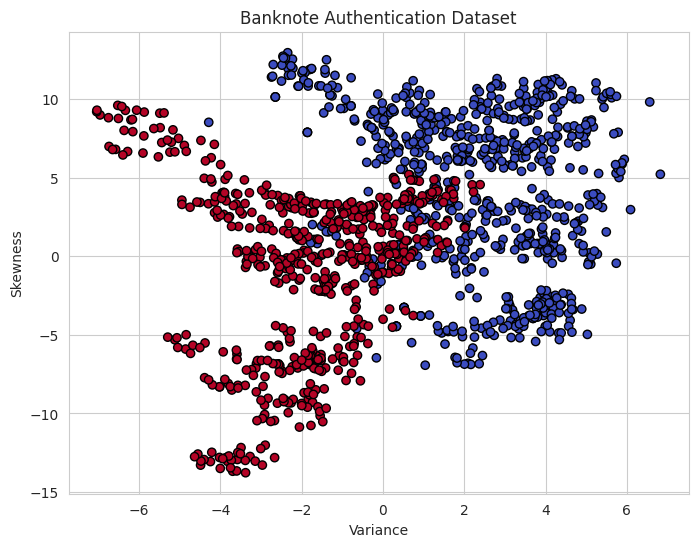

In [8]:
# Visualize the Banknote Authentication dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_banknote[:, 0], X_banknote[:, 1], c=y_banknote, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.title('Banknote Authentication Dataset')
plt.show()

### Step 2.2: Train and Evaluate SVM Kernels

In [9]:
models_banknote = {}

for kernel in kernels:
    # Initialize and train the SVM
    svm_model = SVC(kernel=kernel, C=1, random_state=42)
    svm_model.fit(X_train_banknote_scaled, y_train_banknote)

    # Store the model
    models_banknote[kernel] = svm_model

    # Make predictions
    y_pred_banknote = svm_model.predict(X_test_banknote_scaled)

    # Replace with your SRN
    print(f"SVM with {kernel.upper()} Kernel PES2UG23CS198")
    print(classification_report(y_test_banknote, y_pred_banknote, target_names=['Forged', 'Genuine']))
    print("-" * 40 + "\n")


SVM with LINEAR Kernel PES2UG23CS198
              precision    recall  f1-score   support

      Forged       0.90      0.88      0.89       229
     Genuine       0.86      0.88      0.87       183

    accuracy                           0.88       412
   macro avg       0.88      0.88      0.88       412
weighted avg       0.88      0.88      0.88       412

----------------------------------------

SVM with RBF Kernel PES2UG23CS198
              precision    recall  f1-score   support

      Forged       0.96      0.91      0.94       229
     Genuine       0.90      0.96      0.93       183

    accuracy                           0.93       412
   macro avg       0.93      0.93      0.93       412
weighted avg       0.93      0.93      0.93       412

----------------------------------------

SVM with POLY Kernel PES2UG23CS198
              precision    recall  f1-score   support

      Forged       0.82      0.91      0.87       229
     Genuine       0.87      0.75      0.81    

### Step 2.3: Visualize Decision Boundaries

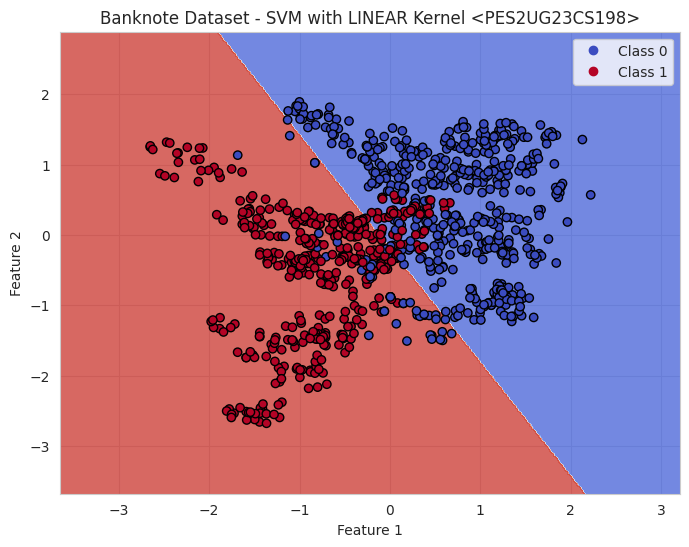

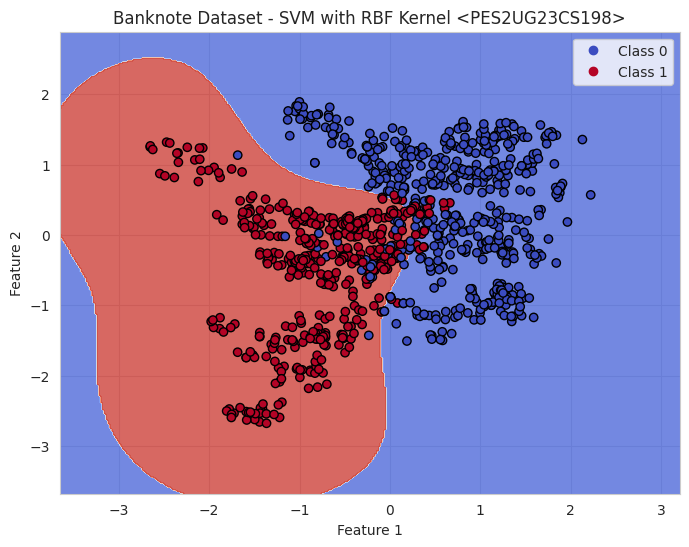

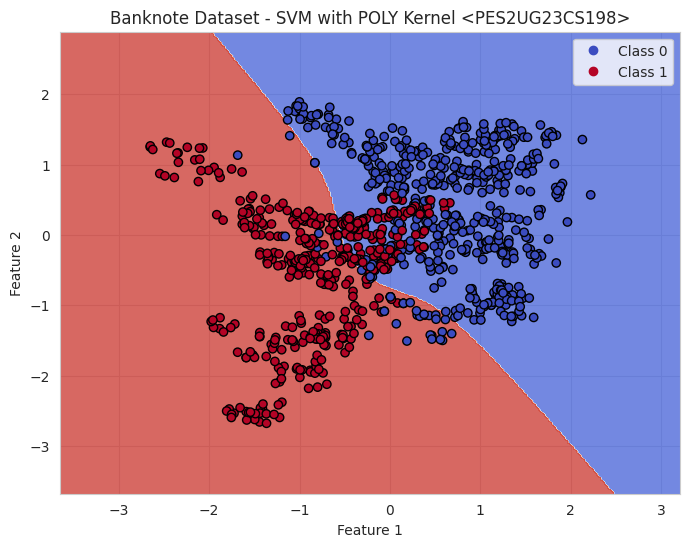

In [10]:
#TODO: Replace with your SRN
for kernel, model in models_banknote.items():
    plot_decision_boundaries(
        X_train_banknote_scaled,
        y_train_banknote,
        model,
        title=f'Banknote Dataset - SVM with {kernel.upper()} Kernel <PES2UG23CS198>'
    )

### Analysis Questions for Banknote:
1. In this case, which kernel appears to be the most effective?

   
Based on both the visualizations and the performance metrics, the RBF (Radial Basis Function) kernel is clearly the most effective for the Banknote dataset.Looking at the numbers, the RBF kernel achieves an impressive accuracy of 93%, which is significantly higher than both the Linear kernel (88%) and the Polynomial kernel (84%). The precision and recall scores are also notably balanced and strong across both classes. For the Forged class, the RBF kernel achieves 96% precision with 91% recall, while for the Genuine class, it maintains 90% precision with an excellent 96% recall. These metrics translate to F1-scores of 0.94 and 0.93 respectively, indicating that the model performs consistently well without favoring one class over the other.
When the decision boundary visualization is examined, the RBF kernel creates a smooth, curved boundary that elegantly separates the two classes. You can see how it wraps around the clusters of data points, particularly adapting to the shape of the red (Class 1) cluster on the left side of the plot. The boundary shows clear flexibility in handling the non-linear separation between forged and genuine banknotes, with minimal misclassification visible in the overlap region near the center.
In contrast, the Linear kernel, while performing reasonably well at 88% accuracy, creates a rigid diagonal boundary that doesn't adapt to the natural clustering of the data. The Polynomial kernel performs the poorest at 84% accuracy, and its boundary appears very similar to the linear one with only slight curvature, failing to capture the complexity of the data distribution effectively.

2. The Polynomial kernel shows lower performance here compared to the Moons dataset. What might be the reason for this?
   
The Polynomial kernel's diminished performance on the Banknote dataset compared to the Moons dataset can be explained by understanding the fundamental difference in data structures between these two datasets.
In the Moons dataset, the classes are separated by smooth, continuous curves that form crescent shapes. Polynomial functions are naturally good at modeling such smooth, gradual curves because they can create boundaries that bend consistently in certain directions. The polynomial's mathematical nature creating curves through combinations of powers of features—aligns reasonably well with the gentle, sweeping curves of the moon shapes, even if it's not perfect.
However, the Banknote dataset presents a very different challenge. Looking at the visualization, we can see that the data clusters have a more complex, irregular distribution. The red cluster (Forged banknotes) has a somewhat blob-like or amorphous shape on the left side, while the blue cluster (Genuine banknotes) is more spread out on the right. The optimal decision boundary needs to be highly adaptive and locally flexible to navigate around these irregular shapes, particularly in the central region where the classes overlap.
The Polynomial kernel struggles here because it tends to create globally smooth boundaries based on polynomial equations. While it can curve and bend, it lacks the local adaptability needed to tightly wrap around irregular cluster shapes. You can see in the visualization that the Polynomial boundary looks almost identical to the Linear boundary—just a diagonal line with minimal curvature. This suggests that either the polynomial degree wasn't high enough to capture the complexity, or the polynomial form itself isn't suitable for this particular data structure.
Additionally, the performance metrics reveal another issue: the Polynomial kernel shows an imbalanced performance between classes, with 91% recall for Forged but only 75% recall for Genuine banknotes. This indicates that the boundary is positioned or shaped in a way that favors one class over the other, likely because the polynomial boundary cannot adapt flexibly enough to optimize for both classes simultaneously in this more complex feature space.
In essence, while polynomial curves worked adequately for the smooth, predictable shapes in the Moons dataset, they fall short when dealing with the irregular, blob-like clusters of the Banknote dataset. The RBF kernel, with its ability to create highly localized, adaptive boundaries, proves far superior for this type of data distribution.

---

# **PART 3**

## 4. Understanding the Hard and Soft Margins
Soft Margin (Small C value, e.g., 0.1): A smaller C value creates a "softer" margin, meaning the model is more tolerant of misclassifications. This results in a wider margin and can lead to better generalization, especially with noisy data.

Hard Margin (Large C value, e.g., 100): A larger C value creates a "harder" margin. The model will try to classify every data point correctly, resulting in a narrower margin. This can lead to overfitting if the data has outliers.

Let's create a dataset that is mostly linearly separable but has some noise, which is perfect for understanding the difference between hard and soft margins.

In [11]:
from sklearn.datasets import make_blobs

# Generate linearly separable data with some noise
X_linear, y_linear = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)

# Add some outliers
outliers_X = np.array([[0.5, 2.5], [1.5, 0.5]])
outliers_y = np.array([1, 0])
X_linear = np.concatenate([X_linear, outliers_X])
y_linear = np.concatenate([y_linear, outliers_y])


# Split and scale the data
X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(
    X_linear, y_linear, test_size=0.3, random_state=42
)
scaler_linear = StandardScaler()
X_train_linear_scaled = scaler_linear.fit_transform(X_train_linear)
X_test_linear_scaled = scaler_linear.transform(X_test_linear)

Now, let's train two SVM models with a linear kernel: one with a small C (soft margin) and one with a large C (hard margin).

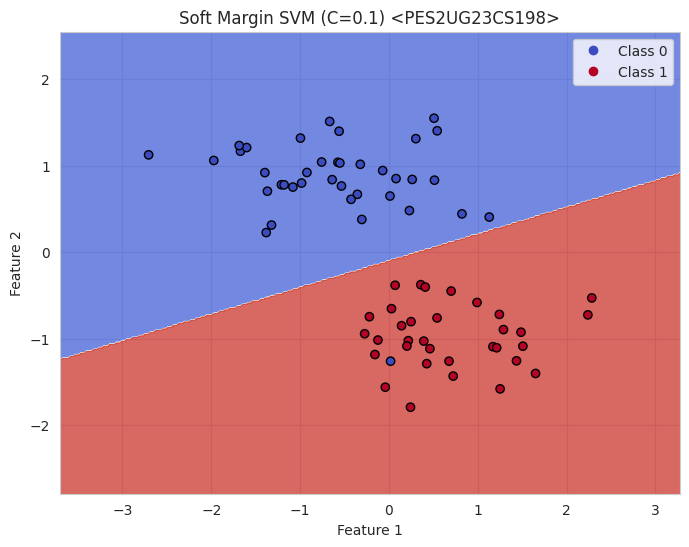

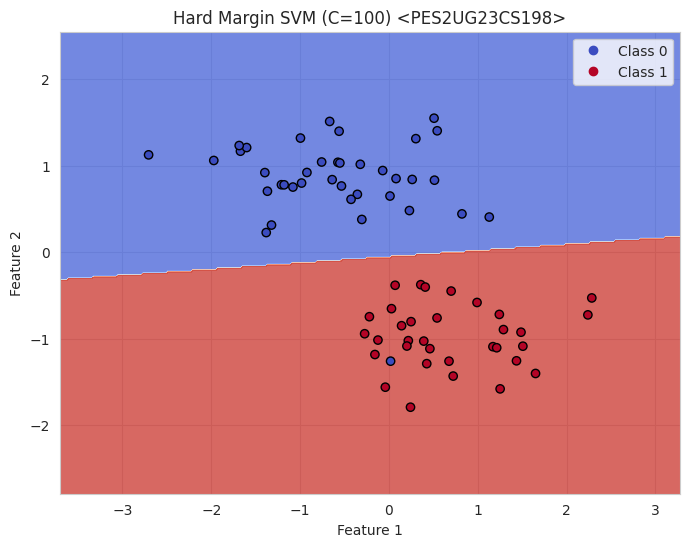

In [12]:
# Soft Margin SVM (small C)
# TODO: Create a linear SVM model with a small C value (e.g., 0.1) for a soft margin.
#          - Set the kernel to 'linear'.
#          - Set C to 0.1.
#          - Set random_state to 42 for consistent results.
# Soft Margin SVM (small C)
svm_soft = SVC(kernel='linear', C=0.1, random_state=42)
svm_soft.fit(X_train_linear_scaled, y_train_linear)

# Replace with your SRN
plot_decision_boundaries(
    X_train_linear_scaled,
    y_train_linear,
    svm_soft,
    title='Soft Margin SVM (C=0.1) <PES2UG23CS198>'
)

# Hard Margin SVM (large C)
svm_hard = SVC(kernel='linear', C=100, random_state=42)
svm_hard.fit(X_train_linear_scaled, y_train_linear)

# Replace with your SRN
plot_decision_boundaries(
    X_train_linear_scaled,
    y_train_linear,
    svm_hard,
    title='Hard Margin SVM (C=100) <PES2UG23CS198>'
)


### Analysis Questions

1. Compare the two plots. Which model, the "Soft Margin" (C=0.1) or the "Hard Margin" (C=100), produces a wider margin?

ans>The Soft Margin SVM (C=0.1) produces a noticeably wider margin compared to the Hard Margin SVM (C=100).
Looking at the two plots, you can clearly see that the soft margin creates more space between the decision boundary and the data points of both classes. The margin bands (the area between the support vectors) are visibly broader in the top image. In contrast, the Hard Margin SVM in the bottom plot shows a much tighter, narrower margin that hugs closer to the data points. This happens because the smaller C value allows the model to prioritize creating a wider separation between classes, even if it means tolerating some misclassifications or points within the margin.

2. Look closely at the "Soft Margin" (C=0.1) plot. You'll notice some points are either inside the margin or on the wrong side of the decision boundary. Why does the SVM allow these "mistakes"? What is the primary goal of this model?

   
ans>The Soft Margin SVM (C=0.1) allows these "mistakes" because its primary goal is to achieve better generalization rather than perfect classification of the training data.
When you look closely at the soft margin plot, you'll notice a few data points that fall either inside the margin area or even on the wrong side of the decision boundary. The model permits these violations because the small C value (0.1) tells the SVM that it's acceptable to misclassify some training points if doing so results in a wider, more robust margin. Essentially, the model is making a trade-off: it sacrifices perfect accuracy on the training data in exchange for creating a decision boundary that's more likely to work well on new, unseen data. The primary goal here is generalization and robustness, especially when dealing with noisy data or outliers. By being more tolerant of errors, the soft margin avoids fitting too closely to every quirk in the training data, which could include noise or exceptional cases that don't represent the true underlying pattern.

3. Which of these two models do you think is more likely to be overfitting to the training data? Explain your reasoning.

   
ans>The Hard Margin SVM (C=100) is much more likely to be overfitting to the training data.
The reason is straightforward: with a large C value of 100, the model is heavily penalizing any misclassifications, which forces it to try to classify every single training point correctly. Looking at the hard margin plot, you can see the decision boundary is positioned very tightly to minimize any training errors, creating a narrow margin. This means the model is fitting very closely to the specific characteristics of the training data, including potential outliers and noise. When a model fits this tightly to training data, it often captures not just the true underlying pattern but also the random variations and anomalies specific to that particular dataset. This makes it vulnerable to performing poorly on new data that has slightly different characteristics. The soft margin, in contrast, deliberately allows some flexibility and doesn't obsess over classifying every training point perfectly, which typically leads to better performance on unseen data.

4. Imagine you receive a new, unseen data point. Which model do you trust more to classify it correctly? Why? In a real-world scenario where data is often noisy, which value of C (low or high) would you generally prefer to start with?

ans>I would trust the Soft Margin SVM (C=0.1) more to classify new, unseen data correctly, and in real-world scenarios with noisy data, I would generally prefer to start with a low C value.
Here's why: real-world data is almost always noisy—it contains outliers, measurement errors, and exceptional cases that don't represent the typical pattern. The soft margin approach is specifically designed to handle this reality. By creating a wider margin and tolerating some training errors, it focuses on finding the most generalizable decision boundary rather than memorizing the training data. When a new data point arrives, the soft margin model is more likely to classify it correctly because it has learned the broader pattern rather than the specific quirks of the training set.
The hard margin model, while achieving potentially perfect or near-perfect accuracy on the training data, is brittle. It has essentially "memorized" the training set, including its noise and outliers. When faced with new data that inevitably has slightly different characteristics, this rigidity becomes a weakness. The model may struggle because it hasn't learned to be flexible and robust.
In practice, when working with real-world data, I would start with a low C value (like 0.1 or even smaller) and then tune it through cross-validation if needed. This gives you a more conservative, generalizable model as your baseline. You can always increase C if you find the model is too tolerant of errors, but starting with a high C value risks overfitting from the beginning. The soft margin philosophy of "it's okay to make some mistakes for the sake of better overall performance" aligns much better with the messy, imperfect nature of real-world data.

---

## 5. Lab Summary and Conclusion
In this lab, you have:

- Trained SVM classifiers on three distinct datasets: one synthetic non-linear, one real-world binary, and one high-dimensional multi-class.

- Implemented and compared three common kernels: Linear, RBF, and Polynomial.

- Evaluated model performance using standard classification reports.

- Visualized decision boundaries to understand how each kernel operates on different data distributions.

- Understood hard and soft margins.



---

